chequeamos la instalación de ultralytics (crearon YOLO)

In [44]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.18  Python-3.9.5 torch-2.3.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
Setup complete  (6 CPUs, 15.4 GB RAM, 441.5/931.4 GB disk)


Obtenemos el path del directorio de trabajo

In [45]:
import os
HOME = os.getcwd()
print(HOME)

d:\Workshop\yolo-test


Importamos la herramienta IPython que nos permite trabajar con imagenes y videos. A su vez, limpiamos cualquier historial anterior

In [40]:
from IPython import display
display.clear_output()

In [48]:
from IPython.display import display, Image

In [47]:
from dotenv import load_dotenv
load_dotenv()

True

In [49]:
from roboflow import Roboflow
rf = Roboflow(api_key=os.getenv('API_KEY',''))
project = rf.workspace("sandokan").project("yolo-test-os8xs")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.18, to fix: `pip install ultralytics==8.0.196`


In [28]:
dataset.location

'd:\\Workshop\\yolo-test\\yolo-test-1'

In [51]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=15 imgsz=200 plots=True

WARNING  Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at 'C:\Users\pablo\AppData\Roaming\Ultralytics\settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.
New https://pypi.org/project/ultralytics/8.2.21 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.9.5 torch-2.3.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=d:\Workshop\yolo-test\yolo-test-1/data.yaml, epochs=15, patience=50, batch=16, imgsz=200, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=N

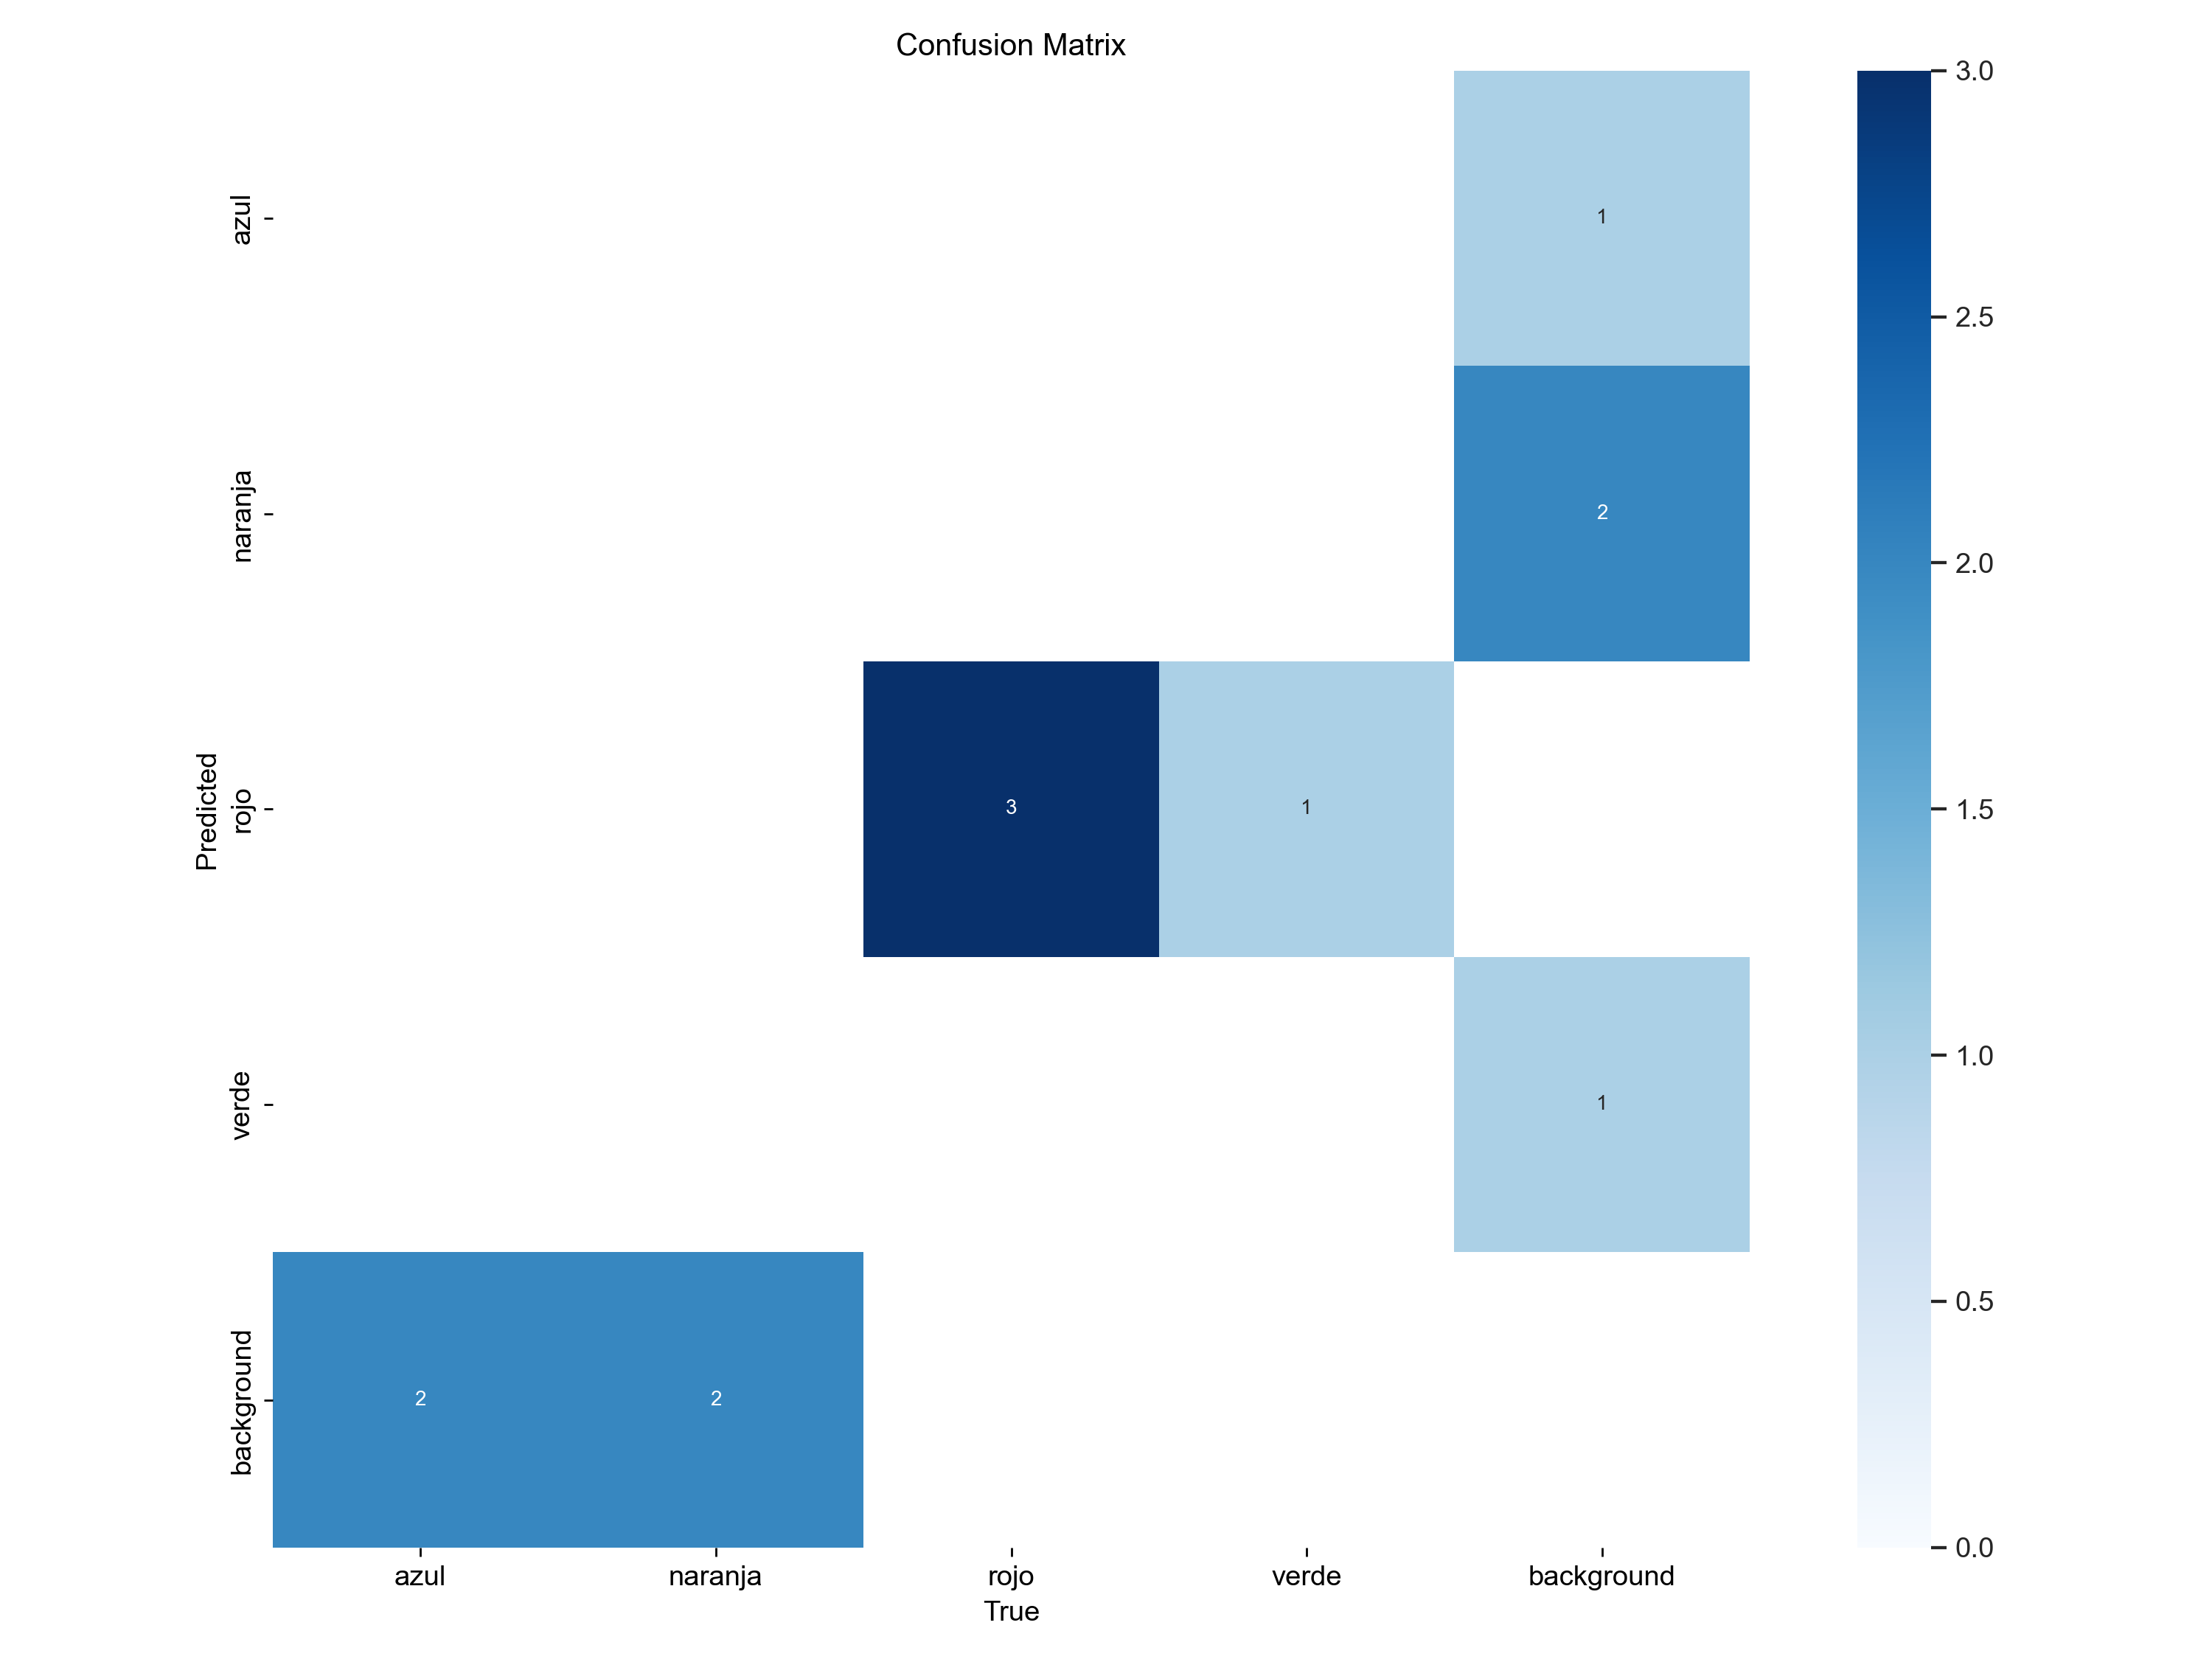

In [53]:
Image(filename=f'runs/detect/train2/confusion_matrix.png', width=600)

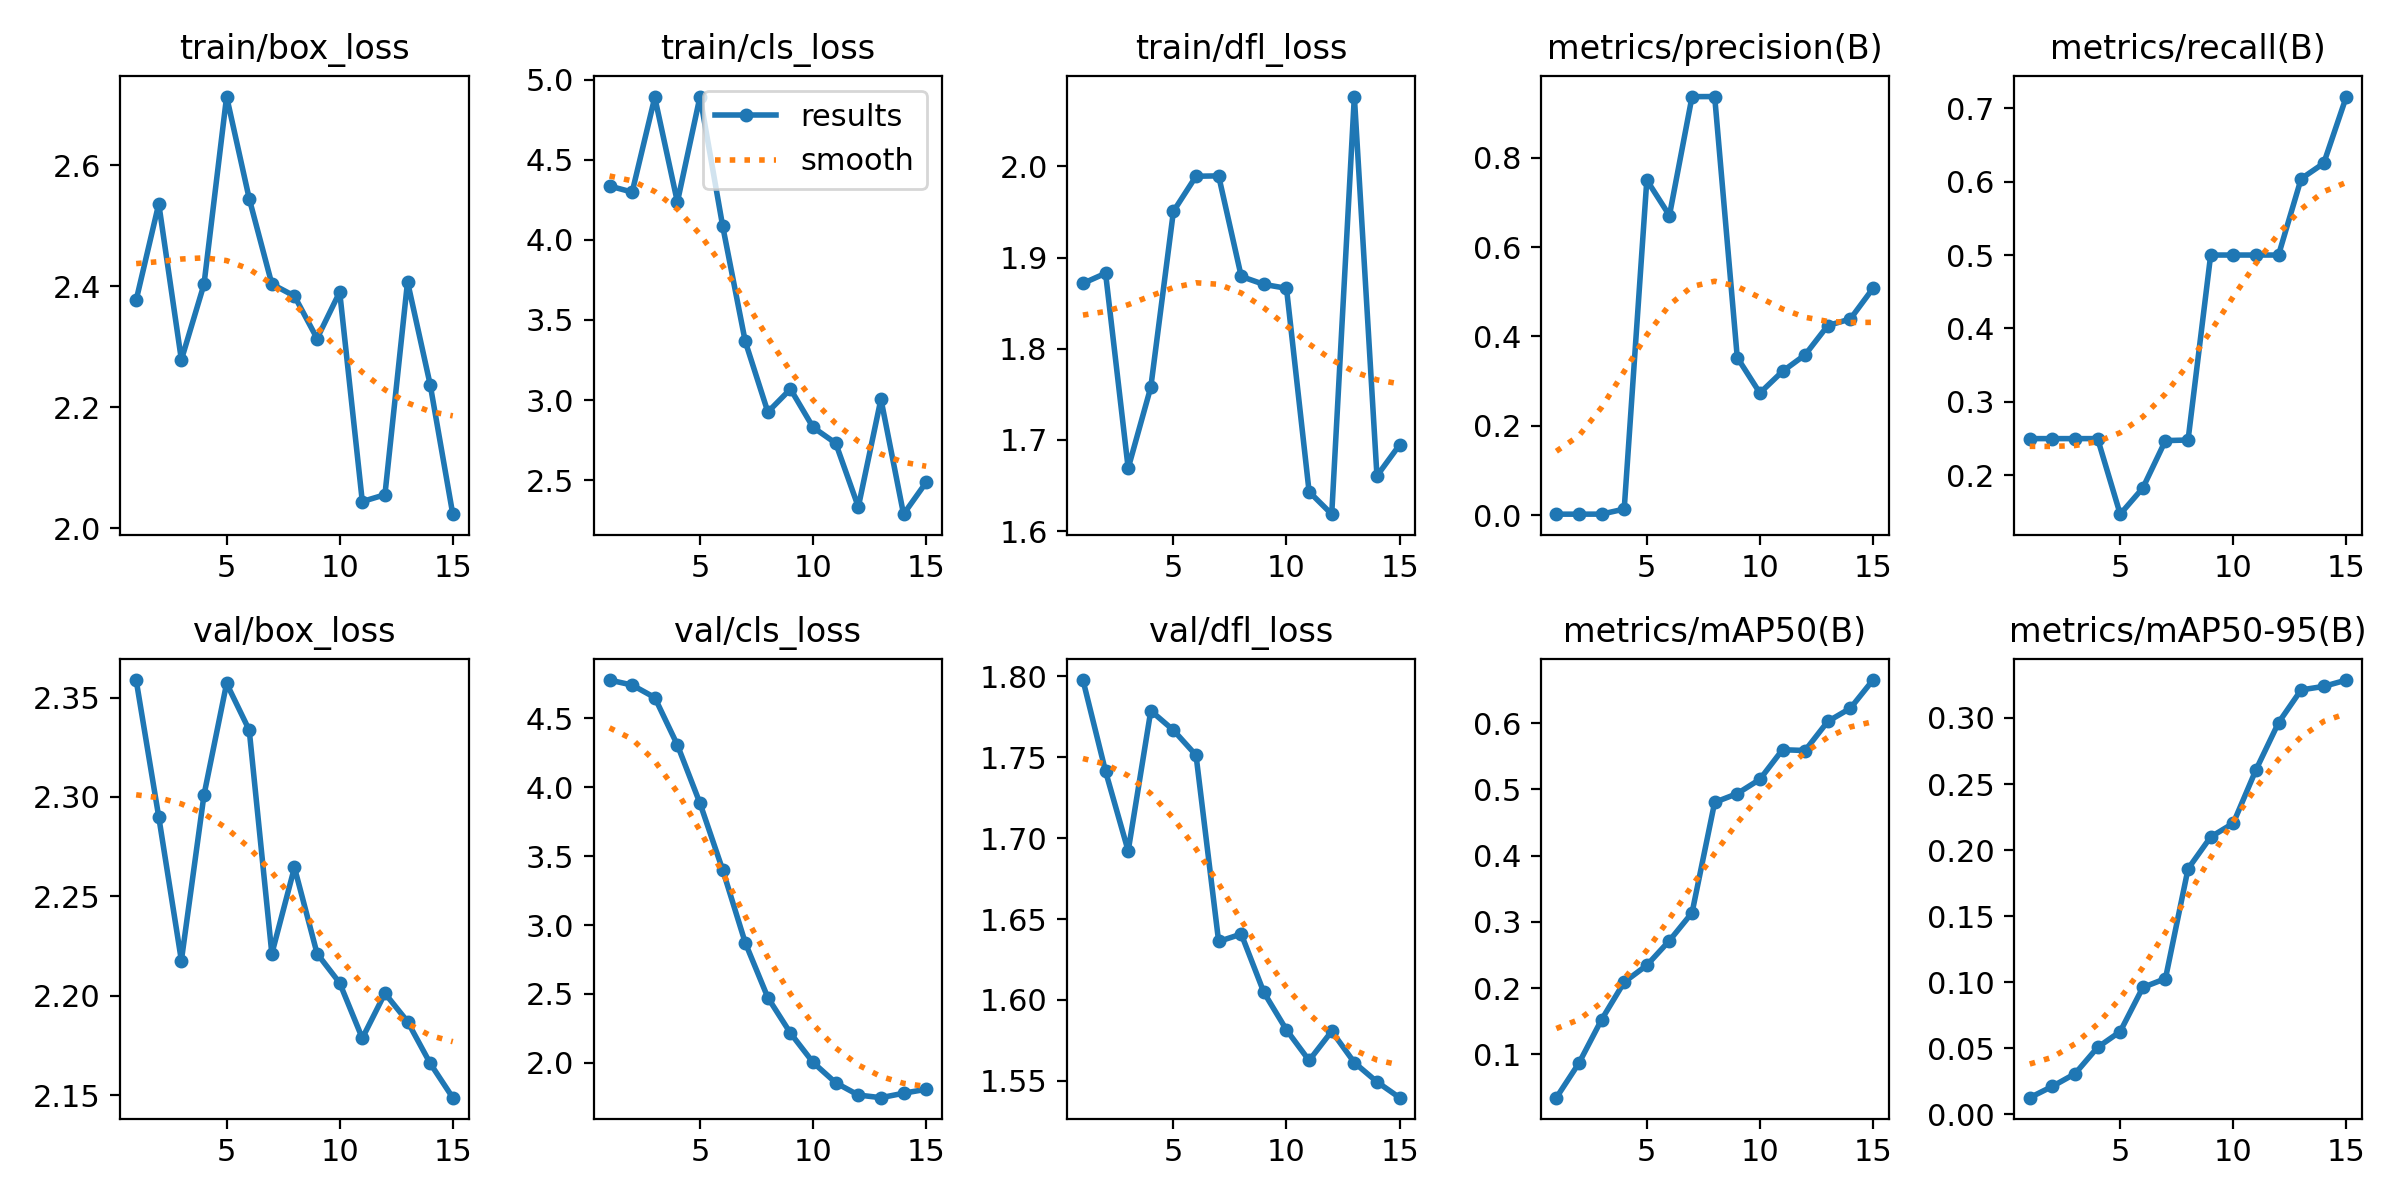

In [55]:
Image(filename=f'runs/detect/train2/results.png', width=600)

In [56]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196  Python-3.9.5 torch-2.3.0+cpu CPU (AMD Ryzen 5 4500U with Radeon Graphics)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

val: Scanning D:\Workshop\yolo-test\yolo-test-1\valid\labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]
val: Scanning D:\Workshop\yolo-test\yolo-test-1\valid\labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
                   all          3          8      0.507      0.716      0.665      0.329
                  azul          3       

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [57]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"runs/detect/train2/")

Dependency ultralytics==8.0.196 is required but found version=8.2.18, to fix: `pip install ultralytics==8.0.196`
View the status of your deployment at: https://app.roboflow.com/sandokan/yolo-test-os8xs/1
Share your model with the world at: https://universe.roboflow.com/sandokan/yolo-test-os8xs/model/1
